In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

**[참고] 데이터프레임 출력 제한 설정**

- 노트북은 데이터프레임이 60행을 넘기면 위 아래 5행씩 10행만 출력하고 중간을 생략함
- 열은 20열을 넘기면 좌우 10열씩 20열만 출력하고 중간을 생략함

In [ ]:
# 모든 행과 열을 출력하도록 설정

# pd.set_option('display.max_rows', None)     # 모든 행 출력하도록 설정
# pr.set_option('display.max_columns', None)  # 모든 열 출력하도록 설정

In [ ]:
# 행과 열을 출력 제한 되돌리기

# pd.reset_option('display.max_rows')      # 행 출력 제한 되돌리기
# pd.reset_option('display.max_columns')   # 열 출력 제한 되돌리기
# pd.reset_option('all')                   # 모든 설정 되돌리기

# pandas 데이터 그룹별 분석

### 그룹별 분석(group analysis)

- 그룹별로 데이터를 요약 : 그룹별 집계, 변형, 필터 등

- pandas에서는 **groupby()** 함수를 통해서 데이터를 그룹화
- 그룹별 분석은 먼저 그룹별로 동일한 연산을 적용하고 그 결과 얻어진 그룹별 연산 결과를 다시 결합하야 반환함

### 그룹별 분석을 위한 분할-적용-조합 패턴

- 분할(SPLIT) : 어떤 기준에 따라 데이터셋을 작은 조각으로 분할한다
- 적용(APPLY) : 각 조각에 대해 독립적으로 연산을 수행한다
- 조합(COMBINE) : 모든 결과를 다시 하나의 단위로 조합한다

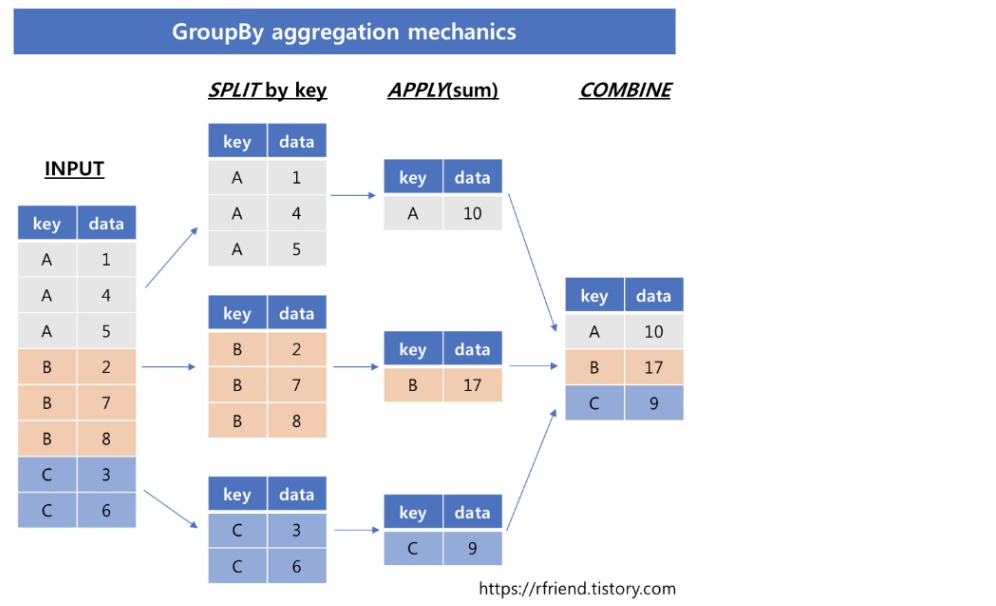

#### ① 데이터 분할(split) 작업

- 시리즈나 데이터프레임의 **groupby() 메소드**를 사용하여 그룹화
- 하나 이상의 인덱스 레이블이나 컬럼명에 기초하여 연관된 값들을 그룹화함

#### ② 데이터 분할 후 각 그룹에 적용(apply)되는 작업

- 집계(aggregation) : 각 그룹의 아이템에 대한 평균이나 개수 등 통계량 계산
- 변형(transform) : 그룹이나 아이템에 특정적인 계산을 수행
- 필터링(filtering) : 그룹 단위의 계산에 기초해 불필요한 데이터 그룹 제거

### groupby () 메서드|¶

- groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, dropna=True,...))
    - by : 열인덱스 또는 행인덱스(mapping, function, label, or list of labels)
    - axis : 0 or 'index', 1 or 'columns' (default 0)


- 연산 결과 : 그룹 데이터를 나타내는**GroupBy 클래스 객체를 반환**
    - 이 객체에는 그룹별로 연산을 할 수 있는 **그룹연산 메서드**가 있음
    

- pandas에서는 **groupby() 메서드**를 사용하여 다음과 같이 그룹분석을 진행
    1. 분석하고자 하는 시리즈나 데이터프레임에 **groupby() 메서드**를 호출하여 그룹화 수행
    2. 그룹 객체에 대해 그룹연산을 수행

### GroupBy 클래스 객체의 그룹 연산 메소드들

- size, count: 그룹 데이터의 갯수

- mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대

- sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수

- first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터


- agg, aggregate

    - 만약 원하는 그룹연산이 없는 경우 함수를 만들고 이 함수를 agg에 전달한다.

    - 또는 여러가지 그룹연산을 동시에 하고 싶은 경우 함수 이름 문자열의 리스트를 전달한다.

- describe

    - 하나의 그룹 대표값이 아니라 여러 개의 값을 데이터프레임으로 구한다.

- apply

    - describe 처럼 하나의 대표값이 아닌 데이터프레임을 출력하지만 원하는 그룹연산이 없는 경우에 사용한다.

- transform

    - 그룹에 대한 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터 자체를 변형한다.

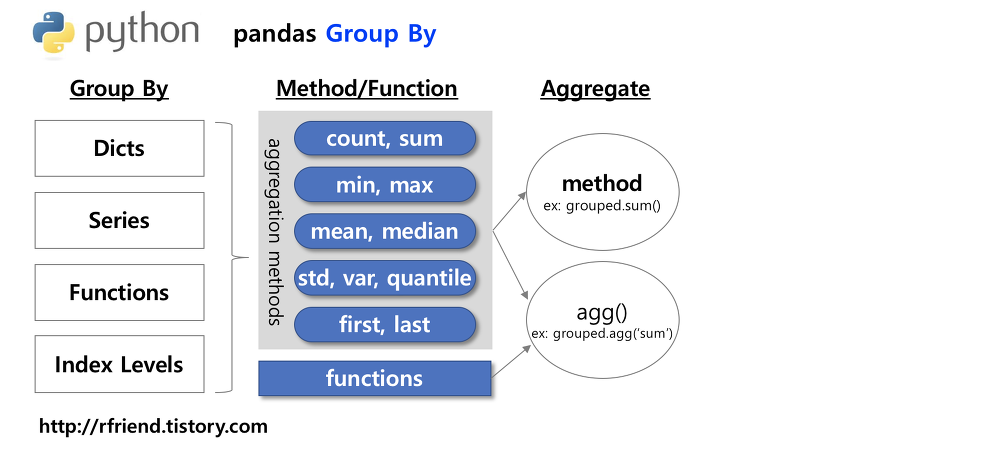

---------------------------

# 1. 데이터 분할

- 단일 컬럼의 그룹화
- 복수 컬럼의 그룹화
- 인덱스 레벨을 이용한 그룹화

## 1) 단일 컬럼의 그룹화

#### 예제1.

In [4]:
data=pd.DataFrame({'key1':['A','A','B','B','A'] , 
                   'key2': ['one','two','one','two','one'],
                   'data1':[1,2,3,4,5],
                   'data2':[10,20,30,40,50]})
data

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [6]:
group = data.groupby(data.key1)
group

### GroupBy클래스 객체의 속성/메서드

- groups
- ngroups
- get_group()
- size()
- count()
- sum()

#### GroupBy클래스객체의 groups 속성
- 그룹 정보 확인


- 각 그룹의 이름을 키로 갖는 딕셔너리를 반환
    - 딕셔너리 값은 각 그룹에 속하는 인덱스 레이블의 배열
    - Dict {group name -> group labels}

In [7]:
group.groups

{'A': [0, 1, 4], 'B': [2, 3]}

#### GroupBy클래스객체의 ngroups 속성

- group 수 반환

In [8]:
group.ngroups

2

#### GroupBy클래스객체의 get_group()

- 지정한 그룹 데이터프레임 가져오기

In [9]:
group.get_group('A')

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
4,A,one,5,50


In [10]:
group.get_group('B')

,key1,key2,data1,data2
2,B,one,3,30
3,B,two,4,40


#### 그룹화된 결과 출력하는 사용자함수 정의

- print_groups(group_object)

- 각 그룹은 그룹명과 일치하는 값들의 행(row)들로 구성된 데이터프레임을 하나씩 포함하고 있음

In [11]:
def print_groups(group_obj):
    for name, group in group_obj:
        print(name)
        print(group)

In [12]:
group
print_groups(group)

A
  key1 key2  data1  data2
0    A  one      1     10
1    A  two      2     20
4    A  one      5     50
B
  key1 key2  data1  data2
2    B  one      3     30
3    B  two      4     40


**그룹정보 groups를 데이터프레임으로 저장**

In [14]:
df_g = pd.DataFrame(group)
df_g

,0,1
0,A,key1 key2 data1 data2 0 A one 1 ...
1,B,key1 key2 data1 data2 2 B one 3 ...


- 첫번째 그룹 정보

In [15]:
df_g.loc[0]

0                                                    A
1      key1 key2  data1  data2
0    A  one      1  ...
Name: 0, dtype: object

In [17]:
df_g.index

RangeIndex(start=0, stop=2, step=1)

In [16]:
df_g.loc[0].values

array(['A',   key1 key2  data1  data2
            0    A  one      1     10
            1    A  two      2     20
            4    A  one      5     50], dtype=object)

- 두번째 그룹 정보

In [18]:
df_g.loc[1]

0                                                    B
1      key1 key2  data1  data2
2    B  one      3  ...
Name: 1, dtype: object

In [19]:
df_g.loc[1].values

array(['B',   key1 key2  data1  data2
            2    B  one      3     30
            3    B  two      4     40], dtype=object)

#### GroupBy클래스객체의 size() 메소드

- 각 그룹의 크기(행의수) 반환

In [20]:
group.size()

key1
A    3
B    2
dtype: int64

#### GroupBy클래스객체의 count() 메소드

- 각 그룹의 컬럼별 아이템 개수 반환(NaN 포함)

In [21]:
group.count()

,key2,data1,data2
key1,,,
A,3,3,3
B,2,2,2


#### GroupBy클래스객체의 sum() 메소드

- 각 그룹의 컬럼별 합계 반환

In [22]:
group.sum()

,data1,data2
key1,,
A,8,80
B,7,70


#### 선택한 컬럼에 대한 그룹별 합계

**방법1**
- 그룹객체[컬럼명].sum()
- 그룹객체.sum()[컬럼명]
- 반환값은 시리즈 형식

In [24]:
group['data1'].sum()
group.sum().data1

key1
A    8
B    7
Name: data1, dtype: int64

key1
A    8
B    7
Name: data1, dtype: int64

In [26]:
type(group.sum().data1)

pandas.core.series.Series

**방법2**

- [컬럼명]리스트로 지정한 경우 : 데이터프레임 형식으로 반환
- 그룹객체[[컬럼명]].sum()
- 그룹객체.sum()[[컬럼명]]

In [28]:
group[['data1']].sum()
group.sum()[['data1']]

,data1
key1,
A,8
B,7


,data1
key1,
A,8
B,7


### 2) 복수 컬럼의 그룹화

- .groupby( ) 메소드에 그룹명의 리스트를 전달하면 여러 컬럼에 대해 그룹화를 수행

In [29]:
data

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [31]:
groups=data.groupby([data.key1, data.key2])
groups

#### 복수 컬럼으로 그룹화할 경우 그룹정보

- 그룹 정보는 튜플형태로 반환

In [32]:
groups.groups

{('A', 'one'): [0, 4], ('A', 'two'): [1], ('B', 'one'): [2], ('B', 'two'): [3]}

**그룹수 반환**

In [33]:
groups.ngroups

4

**그룹별 데이터 가져오기**

In [34]:
groups.get_group(('A', 'one'))

,key1,key2,data1,data2
0,A,one,1,10
4,A,one,5,50


In [35]:
groups.get_group(('B', 'one'))

,key1,key2,data1,data2
2,B,one,3,30


**그룹정보 출력**

- 앞에서 정의한 print_groups()함수 사용

In [36]:
print_groups(groups)

('A', 'one')
  key1 key2  data1  data2
0    A  one      1     10
4    A  one      5     50
('A', 'two')
  key1 key2  data1  data2
1    A  two      2     20
('B', 'one')
  key1 key2  data1  data2
2    B  one      3     30
('B', 'two')
  key1 key2  data1  data2
3    B  two      4     40


### 3) 인덱스 레벨을 이용한 그룹화

- 컬럼 대신 인덱스의 값을 사용해 그룹화

#### 예제2.

- 앞의 data 데이터프레임을 계층형 인덱스를 갖도록 데이터 구성 변경

In [37]:
data

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [41]:
data2 = data.copy()
data2 = data2.set_index(['key1', 'key2'])
data2

data1  data2
key1 key2              
A    one       1     10
     two       2     20
B    one       3     30
     two       4     40
A    one       5     50

In [ ]:
data2.index

**레벨0(key1)을 사용해 그룹화**

In [44]:
print_groups(data2.groupby(level=0))

A
           data1  data2
key1 key2              
A    one       1     10
     two       2     20
     one       5     50
B
           data1  data2
key1 key2              
B    one       3     30
     two       4     40


**레벨1(key2)을 사용해 그룹화**

In [45]:
print_groups(data2.groupby(level=1))

one
           data1  data2
key1 key2              
A    one       1     10
B    one       3     30
A    one       5     50
two
           data1  data2
key1 key2              
A    two       2     20
B    two       4     40


In [46]:
group.indices

{'A': array([0, 1, 4], dtype=int64), 'B': array([2, 3], dtype=int64)}

In [48]:
groups.indices

{('A', 'one'): array([0, 4], dtype=int64),
 ('A', 'two'): array([1], dtype=int64),
 ('B', 'one'): array([2], dtype=int64),
 ('B', 'two'): array([3], dtype=int64)}

#### GroupBy객체 정보와 관련된 속성/메서드

- gb.groups
- gb.ngroups
- gb.indices
- gb.get_group()

------------------------------------------

# 2. 그룹별 집계/변형/필터

- 그룹별 집계 : gb.agg() / gb.aggregate() / gb.apply()
- 그룹별 변형 : gb.transform()
- 그룹별 필터 : gb.filter()

## 2-1. 그룹별 집계①

- 그룹별 요약/기술을 위해 정의된 메서드들을 사용하여 연산(플로팅) 수행

#### 그룹별 요약/기술통계량 관련 메서드

- gb.head()
- gb.tail()
- gb.size()
- gb.count()
- gb.value_counts()
- gb.describe()
- gb.sum()
- gb.prod()
- gb.min()
- gb.max()
- gb.cumsum()
- gb.cumprod()
- gb.cummin()
- gb.cummax()
- gb.mean()
- gb.var()
- gb.std()
- gb.median()
- gb.quantile()
- gb.first()
- gb.last()
- gb.nth()
- gb.rank()


#### 그룹별 시각화 메서드

- gb.plot()
- gb.boxplot()
- gb.hist()

#### 예제3. iris 데이터셋

In [50]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [51]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 픔종별로 그룹화

In [52]:
i_groups = iris.groupby(iris.species)
i_groups

In [53]:
i_groups.groups

{'setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

In [55]:
i_groups.get_group('setosa')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### 품종별 합계 계산

In [56]:
i_groups.sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


#### 품종별 평균 계산

In [57]:
i_groups.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


#### 품종별 기술통계

In [58]:
i_groups.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [59]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

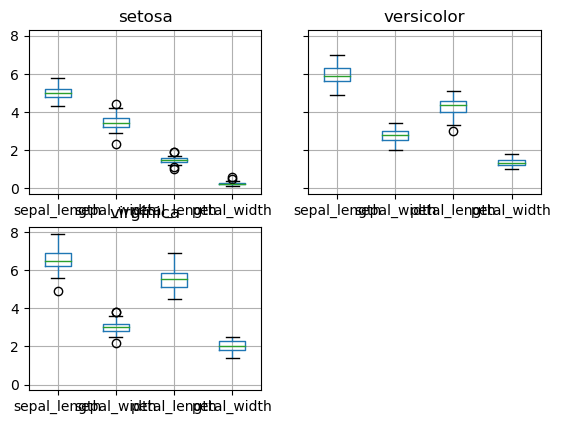

In [60]:
i_groups.boxplot()

species
setosa        [[AxesSubplot(0.125,0.545217;0.336957x0.334783...
versicolor    [[AxesSubplot(0.125,0.545217;0.336957x0.334783...
virginica     [[AxesSubplot(0.125,0.545217;0.336957x0.334783...
dtype: object

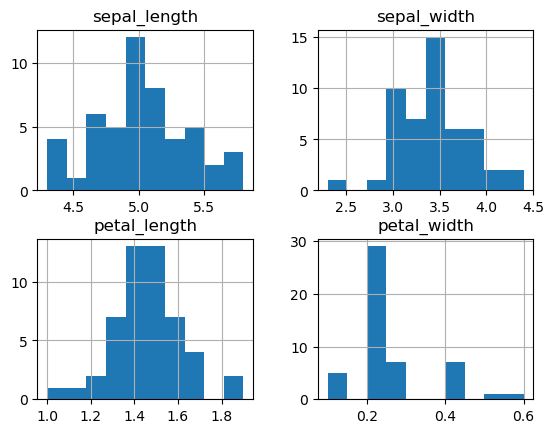

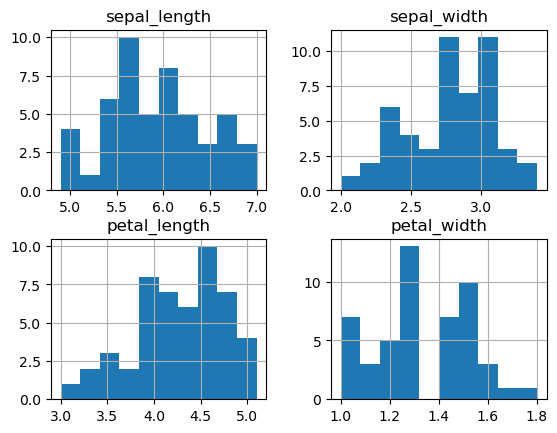

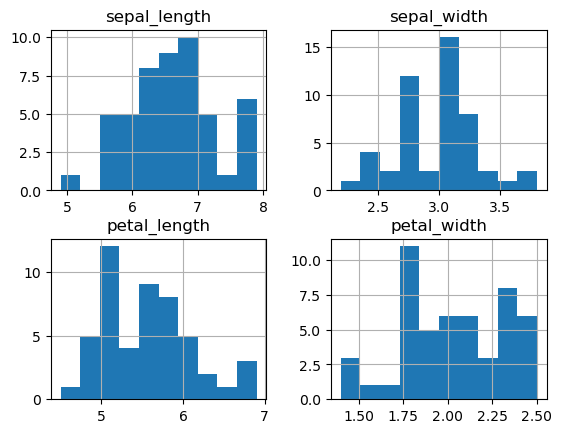

In [61]:
i_groups.hist()

#### [ ] 연산자를 사용해 특정 컬럼에 대한 집계 연산 수행

In [64]:
i_groups['sepal_length'].mean()
i_groups.sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [74]:
i_groups[['sepal_length','sepal_width']].mean()

,sepal_length,sepal_width
species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [75]:
i_groups.petal_length.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [76]:
i_groups.first()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
versicolor,7.0,3.2,4.7,1.4
virginica,6.3,3.3,6.0,2.5


In [77]:
i_groups.last()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.3,1.4,0.2
versicolor,5.7,2.8,4.1,1.3
virginica,5.9,3.0,5.1,1.8


In [78]:
i_groups.nth(10)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.4,3.7,1.5,0.2
versicolor,5.0,2.0,3.5,1.0
virginica,6.5,3.2,5.1,2.0


## 2-2. 그룹별 집계② 

- apply()
- agg() , aggregate()

### 1) agg() 또는 aggregate() 함수

**GroupBy.agg(func, *args, **kwargs)**

- func : 함수이름
    - 내장함수는 np.sum 또는 'sum'과 같은 형식으로 지정
    - 사용자정의함수는 함수이름 그대로
- *args : 함수의 매개변수들
- **kwargs : 함수에 들어가는 키워드 인수들

- 각 그룹에 대해 집계함수를 모두 적용
- 적용할 함수의 참조를 파라미터로 전달
- 데이터프레임의 경우 그룹 안의 각 컬럼 데이터에 적용됨

- **숫자 타입의 스칼라만 리턴하는 함수를 적용**하는 apply()의 특수한 경우
    - 참고. 스칼라(scalar)
        - 하나의 수치(數値)만으로 완전히 표시되는 양
        - 방향의 구별이 없는 물리적 수량
        - 질량·에너지·밀도(密度)·전기량(電氣量) 따위

#### ① agg()에 내장 함수 적용

In [65]:
i_groups.agg(sum)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


#### ② agg()에 사용자정의함수 적용

- 예. 각 컬럼의 최대값과 최소값의 비율 계산하는 함수 ratio() 작성

In [70]:
def ratio(x):
    return x.max()/x.min()
def range(x):
    return x.max()-x.min()

- 품종(그룹)별 최대값과 최소갑의 비율 계산

In [68]:
i_groups.agg(ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [71]:
i_groups.agg(range)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


#### ③ agg()에 여러 함수 적용 : agg([함수1, 함수2,...])

- 함수이름들을 지정한 리스트를 사용

In [72]:
i_groups.agg([np.mean, np.std])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

In [73]:
i_groups.agg(['mean', 'std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

### 2) apply( ) 함수

**GroupBy.apply(func, *args, **kwargs)**

- func : 함수이름
    - 내장함수는 np.sum 또는 'sum'으로 지정, 사용자정의함수는 함수이름 그대로
- *args : 함수의 매개변수들
- **kwargs : 함수에 들어가는 키워드 인수들

#### 예. Top3 산출함수 정의
- petal_length 기준으로 Top3 항목 선택
- 함수의 반환값이 데이터 집합형태

In [79]:
def top3_petal_len(df):
    return df.sort_values(by='petal_length', ascending=False)[:3]

In [80]:
top3_petal_len(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica


- 품종별로 petal_length 기준의 Top3

In [82]:
i_groups.apply(top3_petal_len)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

#### 주의.
- agg( )는 반환값이 수치스칼라인 경우만 사용 가능
- apply()는 반환값이 수치 집합인 경우 적용 가능

In [ ]:
# i_groups.agg(top3_petal_len)
# ValueError

#### 예. 품종별로 최대값과 최소값 비중
- 앞에서 정의한 ratio 함수를 apply를 이용하여 적용

In [83]:
i_groups.apply(ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


#### 예. 수치형자료를 대,중,소 3범주를 갖는 범주형으로 변환

- qcut()함수 응용

In [86]:
def q3cut(s):
    return pd.qcut(s, 3, labels=['소','중', '대'])

In [89]:
q3cut([1,3,4,-1,5,7,2,7]).dtype
# q3cut([1,3,4,-1,5,7,2,7]).astype(str).dtype

CategoricalDtype(categories=['소', '중', '대'], ordered=True)

- 품종별로 petal_length를 대,중,소 3범주로 변환

In [90]:
i_groups.petal_length.apply(q3cut)

0      소
1      소
2      소
3      중
4      소
      ..
145    소
146    소
147    소
148    중
149    소
Name: petal_length, Length: 150, dtype: category
Categories (3, object): ['소' < '중' < '대']

- 품종별로 petal_length를 대,중,소 3범주로 변환된 값을 petal_length_class변수로 추가

In [92]:
iris['petal_len_cls']=i_groups.petal_length.apply(q3cut)
iris.head()
iris.loc[50:55]
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_len_cls
0,5.1,3.5,1.4,0.2,setosa,소
1,4.9,3.0,1.4,0.2,setosa,소
2,4.7,3.2,1.3,0.2,setosa,소
3,4.6,3.1,1.5,0.2,setosa,중
4,5.0,3.6,1.4,0.2,setosa,소


,sepal_length,sepal_width,petal_length,petal_width,species,petal_len_cls
50,7.0,3.2,4.7,1.4,versicolor,대
51,6.4,3.2,4.5,1.5,versicolor,중
52,6.9,3.1,4.9,1.5,versicolor,대
53,5.5,2.3,4.0,1.3,versicolor,소
54,6.5,2.8,4.6,1.5,versicolor,대
55,5.7,2.8,4.5,1.3,versicolor,중


,sepal_length,sepal_width,petal_length,petal_width,species,petal_len_cls
145,6.7,3.0,5.2,2.3,virginica,소
146,6.3,2.5,5.0,1.9,virginica,소
147,6.5,3.0,5.2,2.0,virginica,소
148,6.2,3.4,5.4,2.3,virginica,중
149,5.9,3.0,5.1,1.8,virginica,소


----------------------------------------

## 2-3. 그룹별 변형 : transform()

#### 데이터 변형의 일반적인 과정

transform() 메소드는 데이터프레임의 모든 값에 지정한 함수를 적용하며, 다음의 특성을 갖는 새 데이터프레임을 반환한다

- 모든 그룹의 인덱스가 합쳐진 인덱스를 갖는다
- row의 개수는 모든 그룹의 row 개수의 총합과 같다
- 그룹화 대상이 아닌 컬럼도 함수가 성공적으로 적용된다면 결과에 포함되며, 그렇지 않은 컬럼은 삭제될 수 있다

### 변형 사례1.  모든 그룹의 데이터값 변경

#### 예제4. 

In [93]:
trans_data = pd.DataFrame({'Label' : ['A','C','B','A','C'],
                           'Values': [0, 1, 2, 3, 4],
                           'Values2' : [5, 6, 7, 8, 9],
                           'Other': ['foo','bar','baz','fiz','buz']},
                          index=list('VWXYZ'))
trans_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


#### Label 컬럼으로 그룹화

In [94]:
groups = trans_data.groupby('Label')

#### 그룹 정보 확인

In [98]:
groups.groups
groups.ngroups

{'A': ['V', 'Y'], 'B': ['X'], 'C': ['W', 'Z']}

3

In [99]:
groups.indices

{'A': array([0, 3], dtype=int64),
 'B': array([2], dtype=int64),
 'C': array([1, 4], dtype=int64)}

In [101]:
groups.get_group('A')

,Label,Values,Values2,Other
V,A,0,5,foo
Y,A,3,8,fiz


In [102]:
print_groups(groups)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [103]:
groups.size()

Label
A    2
B    1
C    2
dtype: int64

In [105]:
groups.count()

,Values,Values2,Other
Label,,,
A,2,2,2
B,1,1,1
C,2,2,2


#### 모든 값에 10을 더하는 함수를 적용해 데이터프레임 변형

In [106]:
groups[['Values','Values2']].transform(lambda x : x+10)

,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


In [107]:
# 참고
trans_data[['Values','Values2']].apply(lambda x : x+10)

,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


-> 'Label'과 'Other' 컬럼은 문자열 값들이므로 함수 적용에 실패하여 두 컬럼은 결과에서 제외됨

### 변형의 사례2. 그룹의 평균으로 결측값 채우기

#### 예제5.

In [108]:
trans_data2 = pd.DataFrame({'Label' : list('ABABAB'),
                            'Values' : [10, 20, 11, np.nan, 12, 22]})
trans_data2

,Label,Values
0,A,10.0
1,B,20.0
2,A,11.0
3,B,NaN
4,A,12.0
5,B,22.0


#### 그룹화 및 그룹 정보 확인

In [111]:
groups = trans_data2.groupby('Label')
print_groups(groups)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


#### 각 그룹의 평균 계산

In [113]:
groups.mean()
groups.mean().iloc[1]

,Values
Label,
A,11.0
B,21.0


Values    21.0
Name: B, dtype: float64

**결측치(Nan) 채우기**

- 그룹별 평균으로 채우기

In [114]:
groups.transform(lambda x : x.fillna(x.mean()))

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


In [115]:
groups.apply(lambda x : x.fillna(x.mean()))

C:\Users\yuth9\AppData\Local\Temp\ipykernel_72432\2896571464.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  groups.apply(lambda x : x.fillna(x.mean()))


,Label,Values
0,A,10.0
1,B,20.0
2,A,11.0
3,B,21.0
4,A,12.0
5,B,22.0


## 2-4. 그룹 필터링 : filter()

- 데이터그룹을 조건에 따라 선택적으로 선택
- 조건이 만족하지 않는 경우 삭제

#### 예제6.

In [116]:
df = pd.DataFrame({'Label' : list('AABCCC'),
                   'Values' : [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


### 필터링 예1. 

- 아이템의 개수가 지정한 최소한의 수를 넘는 그룹만 선택

In [120]:
df.groupby('Label').filter(lambda x : x.Values.count()>=2)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


### 필터링 예2.

- NaN이 없는 그룹만 선택
- NaN이 하나라도 존재하는 그룹 제외

In [124]:
# df.groupby('Label').apply(lambda x:x.Values.isnull().sum())
df.groupby('Label').apply(lambda x : x.Values.isna().sum() == 0)

Label
A     True
B     True
C    False
dtype: bool

In [123]:
df.groupby('Label').apply(lambda x:x.Values.notnull().sum())

Label
A    2
B    1
C    2
dtype: int64

### 필터링 예3.

- 전체 데이터셋 평균과의 차이가 2.0이 넘는 그룹 평균을 가진 그룹만 필터링

In [126]:
# 그룹별 평균
df.groupby('Label').mean()

,Values
Label,
A,1.5
B,3.0
C,6.0


In [135]:
# 전체 평균
mean = df.Values.mean()
mean

3.6

In [128]:
# 그룹 간 평균
df.groupby('Label').mean().mean()


Values    3.5
dtype: float64

In [136]:
df.groupby('Label').filter(lambda x : np.abs((x.Values.mean()- mean)) > 2.0)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


## 정리

1. 1단계 : 그룹으로 분할(split)

- df.groupby([])


2. 2단계 : 그룹별 연산(내장, 사용자함수), 변환, 추출, 적용


3. 3단계 : 그룹별 결과 combine

- 그룹화.내장함수
- 그룹화.agg(함수) : 함수의 반환값이 스칼라
- 그룹화.apply(함수) : 함수의 반환값이 스칼라 집합
- 그룹화.filter(함수) : 데이터추출
- 그룹화.transform(함수) : 데이터변환

----------------------------------